In [23]:
import numpy as np
from matplotlib import pyplot as plt
from simulate_euler import simulate
Tmax = 2
dt = 0.01

## Q1

For function $\dot x= sin(x)$, we serialize around $x=\pi$ to get $\dot x = sin(\pi) + cos(\pi)x = \alpha x$ where $\alpha = 1$

In [2]:
def q1_linearization(x):
    alpha = 1
    return alpha * x

def q1_real(x):
    return np.sin(x)

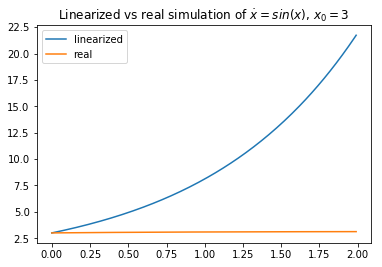

In [17]:
x0 = 3
x_linearized = simulate(q1_linearization, x0, dt, Tmax)
x_real = simulate(q1_real, x0, dt, Tmax)
time_axis = np.arange(0, Tmax, dt)
plt.plot(time_axis, x_linearized)
plt.plot(time_axis, x_real)
plt.legend(['linearized', 'real'])
plt.title(f'Linearized vs real simulation of $\dot x = sin(x)$, $x_0 = {x0}$')
plt.show()

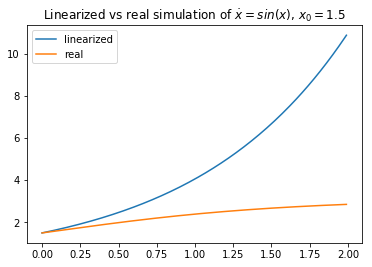

In [21]:
x0 = 1.5
x_linearized = simulate(q1_linearization, x0, dt, Tmax)
x_real = simulate(q1_real, x0, dt, Tmax)
time_axis = np.arange(0, Tmax, dt)
plt.plot(time_axis, x_linearized)
plt.plot(time_axis, x_real)
plt.legend(['linearized', 'real'])
plt.title(f'Linearized vs real simulation of $\dot x = sin(x)$, $x_0 = {x0}$')
plt.show()

## Q2

In [69]:
A = np.array(((-2, 2), (2, 1)))

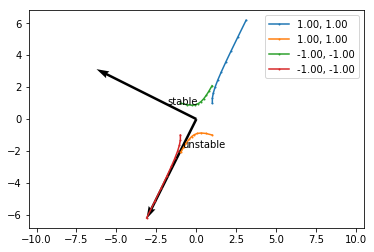

In [173]:
plt.figure()
plt.axes().set_aspect('equal', 'datalim')
eigval, eigvec = np.linalg.eig(A)
traj_init = ((1,1), (1, -1), (-1, 1), (-1, -1))
for x0 in traj_init:
    x = simulate(lambda x: A.dot(x), x0, 0.1, 1)
    plt.plot(x[:, 0], x[:, 1], 'o-', markersize=1)
plt.quiver((0,0),(0,0), eigvec[0, :], eigvec[1, :], scale=3, angles='xy')
plt.legend(["{0:.2f}, {0:.2f}".format(*x) for x in traj_init])
isstable = lambda e: e < 0 and 'stable' or 'unstable'
plt.annotate(isstable(eigval[0]), xy=eigvec[:, 0]*2)
plt.annotate(isstable(eigval[1]), xy=eigvec[:, 1]*2)
plt.show()

## Q3

FizhHugh Nagumo equations:
$$ \dot x = x - \frac{x^3}{3} - y + I $$
$$ \dot y = \epsilon(x + a - by) $$

Jacobian is:
$$ J = \begin{pmatrix}
\frac{\partial \dot x}{\partial x} & \frac{\partial \dot x}{\partial y} \\
\frac{\partial \dot y}{\partial x} & \frac{\partial \dot y}{\partial y}
\end{pmatrix} = \begin{pmatrix}
1-x^2 & -1 \\
\epsilon & -b\epsilon
\end{pmatrix}$$

In [240]:
def q3_jacobian(x, a=0.7, b=0.8, epsilon=0.01):
    return np.array([(1-x[0]**2, -1), (epsilon, -b*epsilon)])

def q3_dx(x, a=0.7, b=0.8, epsilon=0.01):
    return np.array([x[0] - x[0]**3/3 - x[1], epsilon*(x[0] + a - b*x[1])])

In [241]:
x0 = (-0.5, -0.5)
Tmax = 2000
dt = 0.1
x = simulate(q3_dx, x0, dt, Tmax)

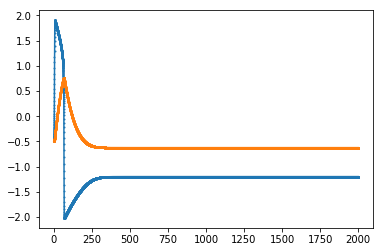

In [242]:
plt.figure()
t_axis = np.arange(0, Tmax, dt)
plt.plot(t_axis, x, 'o-', markersize=1)
plt.show()

In [243]:
stable_values = x[-1, :]
print(f"Stable values are: (x,y) = {np.array2string(stable_values, precision=2)}")

Stable values are: (x,y) = [-1.2  -0.62]


In [244]:
for epsilon in (0.01, 0.025, 0.05, 0.1, 1, 100):
    J = q3_jacobian(stable_values, epsilon=epsilon)
    eigvals, eigvecs = np.linalg.eig(J)
    print(f"For epsilon={epsilon}, eigenvalues are: {eigvals}")

For epsilon=0.01, eigenvalues are: [-0.4139458  -0.03263383]
For epsilon=0.025, eigenvalues are: [-0.36641103 -0.0921686 ]
For epsilon=0.05, eigenvalues are: [-0.23928982+0.10140793j -0.23928982-0.10140793j]
For epsilon=0.1, eigenvalues are: [-0.25928982+0.26049023j -0.25928982-0.26049023j]
For epsilon=1, eigenvalues are: [-0.61928982+0.98353639j -0.61928982-0.98353639j]
For epsilon=100, eigenvalues are: [ -1.71597954 -78.7226001 ]
